In [ ]:
### Link to tutorial: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

In [ ]:
 import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
 auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials=GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
#####file_id = '1wlQ-A1HQlDiG3NXvWDkMBk25vWcs15SJ' # URL
downloaded.GetContentFile('Copy of housepricedata.csv') 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Copy of housepricedata.csv')

NameError: ignored

In [ ]:
 #####fileDownloaded = drive.CreateFile({'id':'https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view?usp=drivesdk'})

In [ ]:
#####fileDownloaded.GetContentFile(‘housepricedata.csv’)

SyntaxError: ignored

In [ ]:
 
from google.colab import files
uploaded = files.upload()
 
# To store dataset in a Pandas Dataframe
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Copy of housepricedata.csv']))

Saving Copy of housepricedata.csv to Copy of housepricedata.csv


In [ ]:
 import pandas as pd

In [ ]:
df2

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [ ]:
 dataset = df2.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [ ]:
 from sklearn import preprocessing

In [68]:
 min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [69]:
 X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [70]:
 from sklearn.model_selection import train_test_split

In [71]:
 X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [72]:
 X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [73]:
 print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [74]:
 from keras.models import Sequential
from keras.layers import Dense

In [ ]:
 model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [75]:
 model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [76]:
 hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.3088 - accuracy: 0.8843 - val_loss: 0.2499 - val_accuracy: 0.8995
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8925 - val_loss: 0.2503 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.8817 - val_loss: 0.2499 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8888 - val_loss: 0.2495 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8836 - val_loss: 0.2495 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.8919 - val_loss: 0.2506 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy: 0.8871 - val_loss: 0.2490 - val_accuracy: 0.8950
Epoch 8/100
3

In [77]:
 model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.8721


0.8721461296081543

In [78]:
 import matplotlib.pyplot as plt

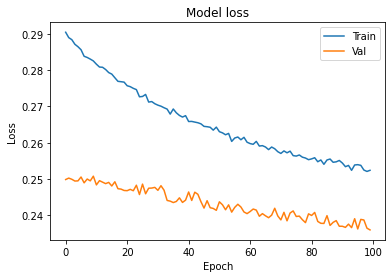

In [79]:
 plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

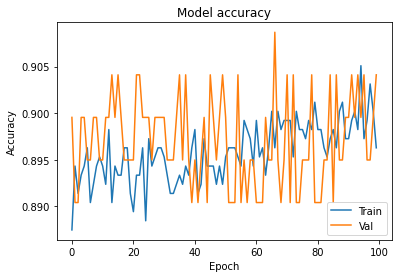

In [82]:
 plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [83]:
 model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [84]:
 model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [85]:
 hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 43ms/step - loss: 0.5594 - accuracy: 0.6989 - val_loss: 0.3437 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3511 - accuracy: 0.8473 - val_loss: 0.3388 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2946 - accuracy: 0.8778 - val_loss: 0.3558 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3001 - accuracy: 0.8887 - val_loss: 0.2581 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2600 - accuracy: 0.8956 - val_loss: 0.3220 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2872 - accuracy: 0.8726 - val_loss: 0.2766 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2205 - accuracy: 0.9127 - val_loss: 0.2765 - val_accuracy: 0.8904
Epoch 

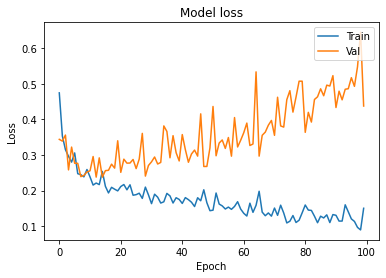

In [86]:
 plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

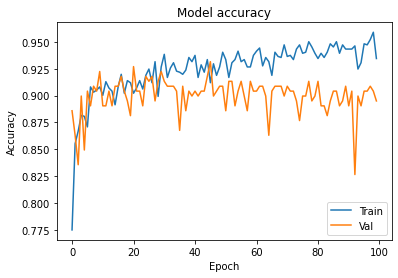

In [88]:
 plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [89]:
 from keras.layers import Dropout
from keras import regularizers

In [90]:
 model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [91]:
 model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [92]:
 hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 66ms/step - loss: 21.1445 - accuracy: 0.5445 - val_loss: 3.9050 - val_accuracy: 0.7763
Epoch 2/100
32/32 [==============================] - 2s 62ms/step - loss: 2.4969 - accuracy: 0.8025 - val_loss: 0.7871 - val_accuracy: 0.7626
Epoch 3/100
32/32 [==============================] - 2s 58ms/step - loss: 0.7247 - accuracy: 0.7853 - val_loss: 0.5117 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 2s 60ms/step - loss: 0.5265 - accuracy: 0.8730 - val_loss: 0.4659 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 2s 58ms/step - loss: 0.4904 - accuracy: 0.8804 - val_loss: 0.4621 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 2s 61ms/step - loss: 0.4874 - accuracy: 0.8760 - val_loss: 0.4946 - val_accuracy: 0.8493
Epoch 7/100
32/32 [==============================] - 2s 59ms/step - loss: 0.4654 - accuracy: 0.8802 - val_loss: 0.4257 - val_accuracy: 0.8950
Epoch

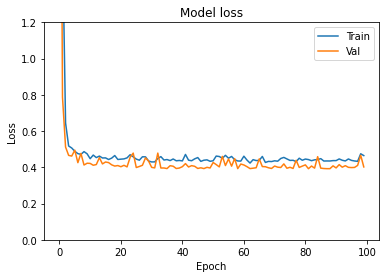

In [93]:
 plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

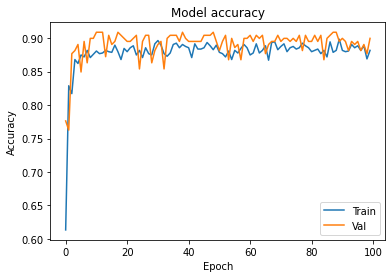

In [95]:
 plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()